# pysedm tutorial | Wavelength Solution, from ccd trace to spectrum. 
How to create a spectrum from scratch (assuming you created the tracematch before)

In [49]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

In [3]:
import pysedm

/Library/Python/2.7/site-packages/astrobject-0.5.6-py2.7.egg/astrobject/astrometry.py:20: UserWarning: ImportError - astLib can not be imported ; PTF-like images won't load.


# 1. Load the CCD and the TraceMatcher

In [19]:
night = "20171202"

In [4]:
tmap  = pysedm.io.load_nightly_tracematch(night)

In [5]:
ccd   = pysedm.get_ccd( pysedm.io.get_night_files(night,"ccd.crr","02_01_50")[0], tracematch=tmap) 

a floating-point value was expected. [astropy.wcs.wcs]


We are going to analyze trace 820 for it contains some standard star light

<IPython.core.display.Javascript object>


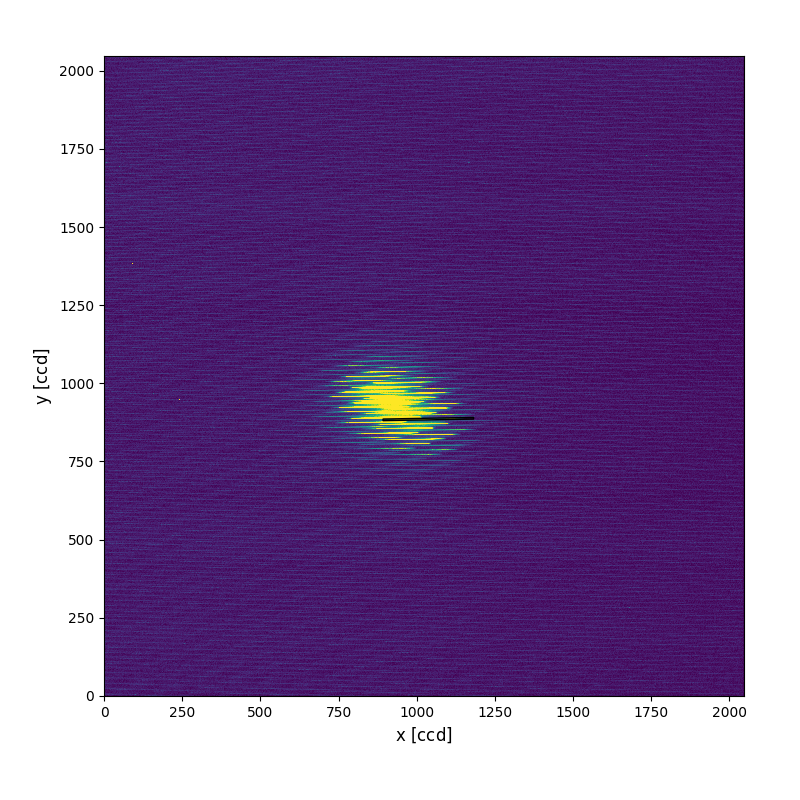

In [16]:
spaxelid = 820
pl = ccd.show()
ccd.tracematch.display_traces(pl["ax"],spaxelid)

# 2. Build the Wavelength solution for this very spaxel

### 1. Load the Arclamps

In [20]:
Cd = pysedm.get_ccd(pysedm.io.get_night_files(night,"ccd.lamp","Cd")[0], tracematch=tmap)
Hg = pysedm.get_ccd(pysedm.io.get_night_files(night,"ccd.lamp","Hg")[0], tracematch=tmap)
Xe = pysedm.get_ccd(pysedm.io.get_night_files(night,"ccd.lamp","Xe")[0], tracematch=tmap)

### 2. Build the WaveSolution object (enables to fit)

In [21]:
wsol_full = pysedm.wavesolution.get_wavesolution(Hg,Xe,Cd)

and fit the wavelength solution

In [22]:
# Basic fit parameters
wavedegree=4
contdegree=3

wsol_full.fit_wavelesolution(traceindex=spaxelid, saveplot=None, show=False, 
                             contdegree=contdegree,wavedegree=wavedegree)


/Library/Python/2.7/site-packages/pysedm-0.6.0-py2.7.egg/pysedm/wavesolution.py:1358: UserWarning: line 8280.01 skiped since Xe loaded
/Library/Python/2.7/site-packages/modefit-0.2.1-py2.7.egg/modefit/baseobjects.py:1129: UserWarning: No value set for 'use_minuit' => True is set by default


Let's see how it looks like

<IPython.core.display.Javascript object>


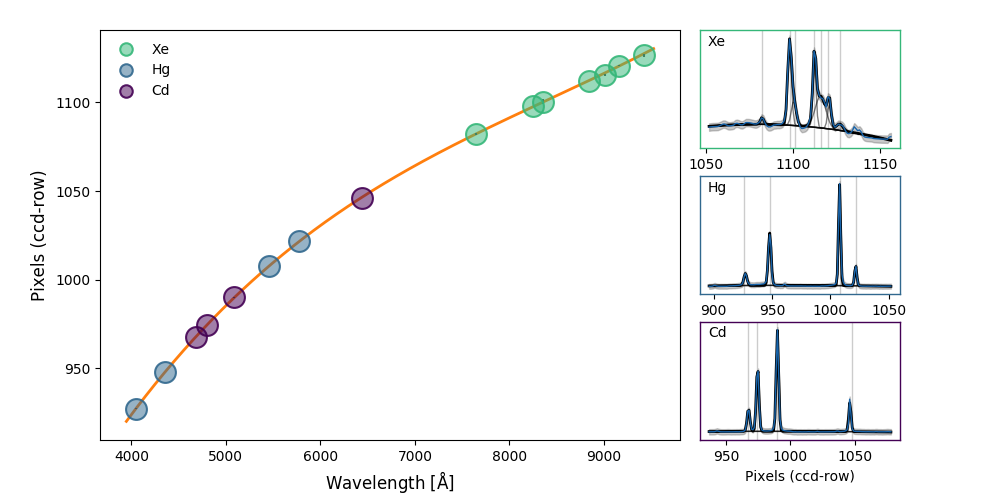

In [23]:
wsol_full._wsol.show(show_guesses=True)

Seems just fine !

# 3. Use the wavelength solution to extract a wavelength calibrated spectra

In [37]:
spec = ccd.extract_spectrum(spaxelid, wsol_full, lbda=pysedm.SEDM_LBDA)

<IPython.core.display.Javascript object>


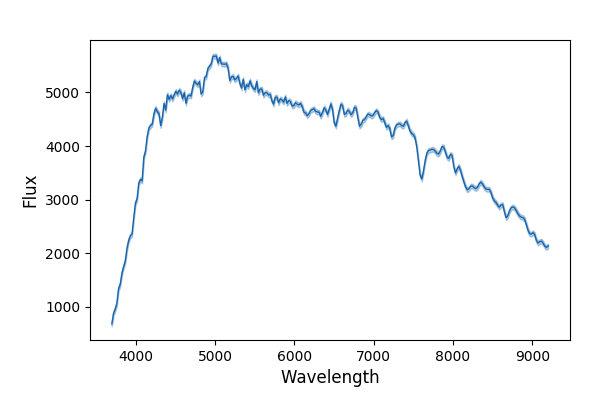

{'ax': <matplotlib.axes._axes.Axes at 0x11f5c2450>,
 'fig': <matplotlib.figure.Figure at 0x11f5ac9d0>,
 'plot': ([<matplotlib.lines.Line2D at 0x11f611750>],
  <matplotlib.collections.PolyCollection at 0x11f611810>)}

In [25]:
spec.show()

### Let's Compare this new spectrum with a wavelength calibrated Telluric Lines

In [27]:
import pyifu
specb = pyifu.load_spectrum("/Users/mrigault/Libraries/pysedm/data/Data/KPNO_lines.fits")

<IPython.core.display.Javascript object>


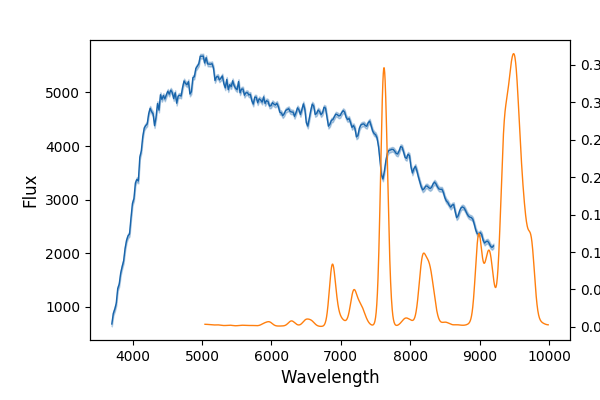

In [48]:
from scipy.ndimage.filters import gaussian_filter 

pl = spec.show()
filter_in_pix = 60 / specb.header["CDELT1"]/ np.sqrt(2)
axt = pl["ax"].twinx()
axt.plot(specb.lbda, 1-gaussian_filter(specb.data,filter_in_pix), color="C1", lw=1, ls="-")


# 5. Test is with another spaxelid now that everything is loaded

### 1. Select your new spaxel id (here a sky)

<IPython.core.display.Javascript object>


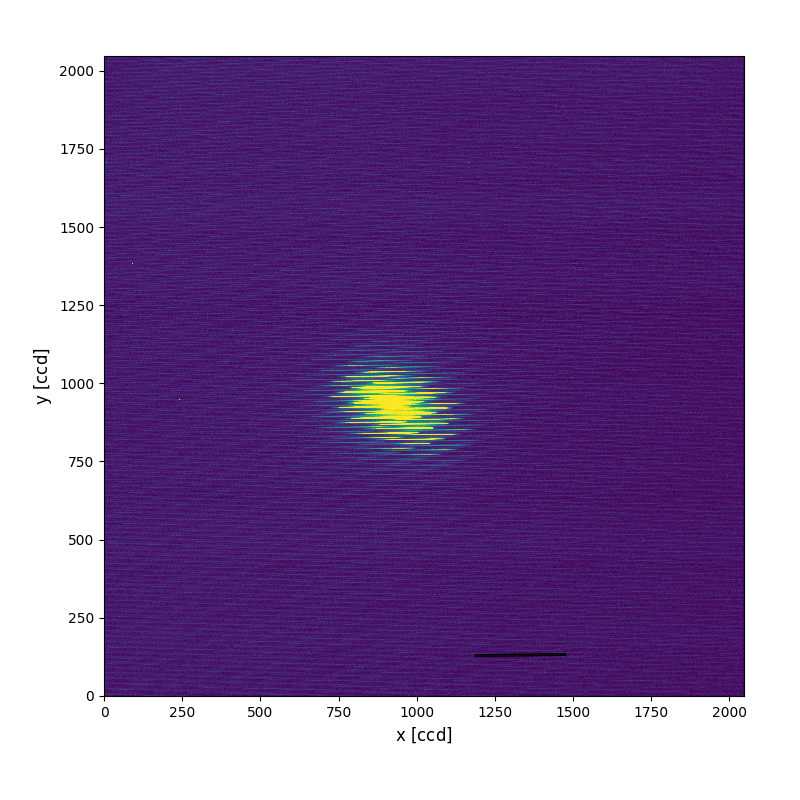

In [33]:
spaxelsky = 120
pl = ccd.show()
ccd.tracematch.display_traces(pl["ax"],spaxelsky)

### 2. Measure the wavelength solution for this spaxel

<IPython.core.display.Javascript object>


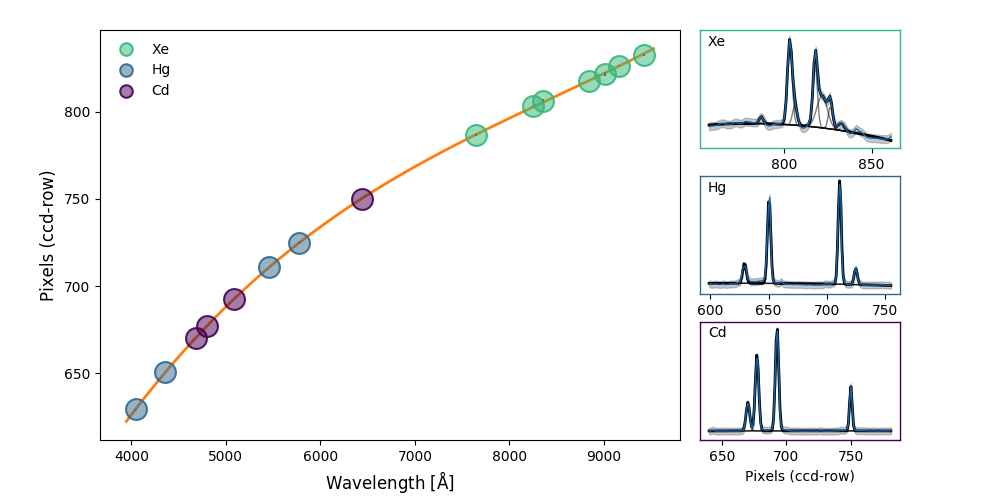

In [35]:
wsol_full.fit_wavelesolution(traceindex=spaxelsky, 
                             saveplot=None, show=False, 
                             contdegree=contdegree,wavedegree=wavedegree)
wsol_full._wsol.show()

### 3. Get the spectrum

In [43]:
specsky = ccd.extract_spectrum(spaxelsky, wsol_full, lbda=pysedm.SEDM_LBDA)

<IPython.core.display.Javascript object>


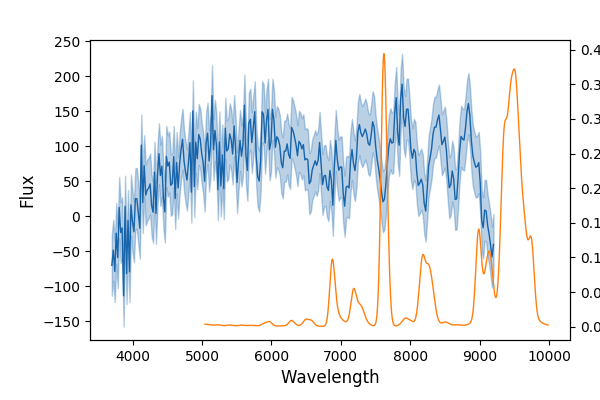

In [46]:
pl = specsky.show()

filter_in_pix = 50 / specb.header["CDELT1"]/ np.sqrt(2)
axt = pl["ax"].twinx()

axt.plot(specb.lbda, 1-gaussian_filter(specb.data,filter_in_pix), color="C1", lw=1, ls="-")

